# 판다스 10분


판다스 초보자들을 위한 판다스 기초 내용을 다룬다.
보다 깊은 내요은 [판다스 요리책](https://pandas.pydata.org/docs/user_guide/cookbook.html#cookbook)을 참고한다.

**필수 라이브러리**

In [1]:
import numpy as np
import pandas as pd

## 객체 생성

참고: [판다스 자료구조](https://pandas.pydata.org/docs/user_guide/dsintro.html#dsintro)

**시리즈 객체 생성**

리스트를 이용하여 시리즈를 생성할 수 있다.

In [2]:
s = pd.Series([1, 3, 5, np.nan, 6, 8])
s

0    1.0
1    3.0
2    5.0
3    NaN
4    6.0
5    8.0
dtype: float64

**데이터프레임 객체 생성**

방식 1: 2차원 어레이, 인덱스 라벨, 열 라벨을 지정하여 데이터프레임을 생성할 수 있다.

- 인덱스 라벨: 날짜시간(`datetime`) 인덱스 이용

In [3]:
dates = pd.date_range(start="20130101", periods=6)
dates

DatetimeIndex(['2013-01-01', '2013-01-02', '2013-01-03', '2013-01-04',
               '2013-01-05', '2013-01-06'],
              dtype='datetime64[ns]', freq='D')

- 열 라벨은 A, B, C, D로 지정

In [4]:
df = pd.DataFrame(np.random.randn(6, 4), index=dates, columns=list("ABCD"))
df

A         B         C         D
2013-01-01  2.248899  0.046926 -0.351705  0.684041
2013-01-02  0.999714 -0.218306 -0.749276 -0.985636
2013-01-03 -0.413663  1.160291 -1.120518 -0.538662
2013-01-04 -0.345486 -1.493639  0.304504 -0.089394
2013-01-05 -0.818965  0.478500 -0.305849 -0.557557
2013-01-06 -0.312422 -0.691075  0.980645 -0.180836

방식 2: 사전 객체를 이용할 수도 있다.
- 사전의 키; 열 라벨
- 인덱스 라벨: 정수 인덱스 자동 지정

In [5]:
df2 = pd.DataFrame(
    {
        "A": 1.0,
        "B": pd.Timestamp("20130102"),
        "C": pd.Series(1, index=list(range(4)), dtype="float32"),
        "D": np.array([3] * 4, dtype="int32"),
        "E": pd.Categorical(["test", "train", "test", "train"]),
        "F": "foo",
    }
)

df2

A          B    C  D      E    F
0  1.0 2013-01-02  1.0  3   test  foo
1  1.0 2013-01-02  1.0  3  train  foo
2  1.0 2013-01-02  1.0  3   test  foo
3  1.0 2013-01-02  1.0  3  train  foo

열별로 다른 자료형이 사용될 수 있다.

In [6]:
df2.dtypes

A           float64
B    datetime64[ns]
C           float32
D             int32
E          category
F            object
dtype: object

## 데이터 살펴보기

참고: [데이터프레임 핵심 기초](https://pandas.pydata.org/docs/user_guide/basics.html#basics)

- 처음 5행 확인

In [7]:
df.head()

A         B         C         D
2013-01-01  2.248899  0.046926 -0.351705  0.684041
2013-01-02  0.999714 -0.218306 -0.749276 -0.985636
2013-01-03 -0.413663  1.160291 -1.120518 -0.538662
2013-01-04 -0.345486 -1.493639  0.304504 -0.089394
2013-01-05 -0.818965  0.478500 -0.305849 -0.557557

- 끝에서 3행 확인

In [8]:
df.tail(3)

A         B         C         D
2013-01-04 -0.345486 -1.493639  0.304504 -0.089394
2013-01-05 -0.818965  0.478500 -0.305849 -0.557557
2013-01-06 -0.312422 -0.691075  0.980645 -0.180836

- 인덱스 라벨 확인

In [9]:
df.index

DatetimeIndex(['2013-01-01', '2013-01-02', '2013-01-03', '2013-01-04',
               '2013-01-05', '2013-01-06'],
              dtype='datetime64[ns]', freq='D')

- 열 라벨 확인

In [10]:
df.columns

Index(['A', 'B', 'C', 'D'], dtype='object')

- 넘파이 어레이로 변환: 인덱스 라벨과 열 라벨 정보 삭제

In [11]:
df.to_numpy()

array([[ 2.24889899,  0.04692628, -0.35170474,  0.68404122],
       [ 0.99971394, -0.21830643, -0.74927608, -0.98563598],
       [-0.41366314,  1.16029064, -1.1205183 , -0.5386621 ],
       [-0.34548629, -1.49363911,  0.3045043 , -0.08939447],
       [-0.81896487,  0.47849974, -0.30584942, -0.55755664],
       [-0.31242248, -0.69107523,  0.98064495, -0.18083565]])

- 열별 자료형이 통일되지 않은 경우: `object`로 통일된 자료형 사용. 시간 소요.

In [12]:
df2.to_numpy()

array([[1.0, Timestamp('2013-01-02 00:00:00'), 1.0, 3, 'test', 'foo'],
       [1.0, Timestamp('2013-01-02 00:00:00'), 1.0, 3, 'train', 'foo'],
       [1.0, Timestamp('2013-01-02 00:00:00'), 1.0, 3, 'test', 'foo'],
       [1.0, Timestamp('2013-01-02 00:00:00'), 1.0, 3, 'train', 'foo']],
      dtype=object)

- 수치형 데이터의 분포 확인

In [13]:
df.describe()

A         B         C         D
count  6.000000  6.000000  6.000000  6.000000
mean   0.226346 -0.119551 -0.207033 -0.278007
std    1.166908  0.921725  0.752519  0.568750
min   -0.818965 -1.493639 -1.120518 -0.985636
25%   -0.396619 -0.572883 -0.649883 -0.552833
50%   -0.328954 -0.085690 -0.328777 -0.359749
75%    0.671680  0.370606  0.151916 -0.112255
max    2.248899  1.160291  0.980645  0.684041

- 전치 데이터프레임

In [14]:
df.T

2013-01-01  2013-01-02  2013-01-03  2013-01-04  2013-01-05  2013-01-06
A    2.248899    0.999714   -0.413663   -0.345486   -0.818965   -0.312422
B    0.046926   -0.218306    1.160291   -1.493639    0.478500   -0.691075
C   -0.351705   -0.749276   -1.120518    0.304504   -0.305849    0.980645
D    0.684041   -0.985636   -0.538662   -0.089394   -0.557557   -0.180836

- 열 라벨 내림차순 정렬

In [15]:
df.sort_index(axis=1, ascending=False)

D         C         B         A
2013-01-01  0.684041 -0.351705  0.046926  2.248899
2013-01-02 -0.985636 -0.749276 -0.218306  0.999714
2013-01-03 -0.538662 -1.120518  1.160291 -0.413663
2013-01-04 -0.089394  0.304504 -1.493639 -0.345486
2013-01-05 -0.557557 -0.305849  0.478500 -0.818965
2013-01-06 -0.180836  0.980645 -0.691075 -0.312422

- 특정 열의 값을 기준으로 행 정렬

In [16]:
df.sort_values(by='B')

A         B         C         D
2013-01-04 -0.345486 -1.493639  0.304504 -0.089394
2013-01-06 -0.312422 -0.691075  0.980645 -0.180836
2013-01-02  0.999714 -0.218306 -0.749276 -0.985636
2013-01-01  2.248899  0.046926 -0.351705  0.684041
2013-01-05 -0.818965  0.478500 -0.305849 -0.557557
2013-01-03 -0.413663  1.160291 -1.120518 -0.538662

## 인덱싱/슬라이싱

In [17]:
type(pd.core.indexing._LocIndexer)

type

In [18]:
type(abs)

builtin_function_or_method

In [19]:
np.r_

In [20]:
type(np.c_)

numpy.lib.index_tricks.CClass

권장 사항: 넘파이 어레이의 인덱싱, 슬라이싱 방식보다 아래 방식 권장됨. 보다 효율적이고 빠름.

- [`DataFrame.at[]`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.at.html#pandas.DataFrame.at)
- [`DataFrame.iat[]`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.iat.html#pandas.DataFrame.iat)
- [`DataFrame.loc[]`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.loc.html#pandas.DataFrame.loc)
- [`DataFrame.iloc[]`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.iloc.html#pandas.DataFrame.iloc)

참고

- [Indexing and Selecting Data](https://pandas.pydata.org/docs/user_guide/indexing.html#indexing)
- [MultiIndex / Advanced Indexing](https://pandas.pydata.org/docs/user_guide/advanced.html#advanced)

### 열 선택

열 라벨을 이용한 인덱싱. 시리즈 생성.

In [21]:
df["A"]

2013-01-01    2.248899
2013-01-02    0.999714
2013-01-03   -0.413663
2013-01-04   -0.345486
2013-01-05   -0.818965
2013-01-06   -0.312422
Freq: D, Name: A, dtype: float64

객체의 속성처럼 이용하는 방식도 가능.

In [22]:
df.A

2013-01-01    2.248899
2013-01-02    0.999714
2013-01-03   -0.413663
2013-01-04   -0.345486
2013-01-05   -0.818965
2013-01-06   -0.312422
Freq: D, Name: A, dtype: float64

### 행 슬라이싱

정수 인덱스 활용. 데이터프레임 생성

In [23]:
df[0:3]

A         B         C         D
2013-01-01  2.248899  0.046926 -0.351705  0.684041
2013-01-02  0.999714 -0.218306 -0.749276 -0.985636
2013-01-03 -0.413663  1.160291 -1.120518 -0.538662

인덱스 라벨 활용. 정수 인덱스 방식과 조금 다름.

In [24]:
df["20130101":"20130103"]

A         B         C         D
2013-01-01  2.248899  0.046926 -0.351705  0.684041
2013-01-02  0.999714 -0.218306 -0.749276 -0.985636
2013-01-03 -0.413663  1.160291 -1.120518 -0.538662

### `loc[]`: 라벨 활용 인덱싱/슬라이싱

인덱스 라벨을 이용하면 열 라벨을 인덱스로 사용하는 시리즈가 생성된다.

In [25]:
dates[0]

Timestamp('2013-01-01 00:00:00', freq='D')

In [26]:
df.loc[dates[0]]

A    2.248899
B    0.046926
C   -0.351705
D    0.684041
Name: 2013-01-01 00:00:00, dtype: float64

축 활용. 행과 열에 대한 인덱싱/슬라이싱 동시에 지정.

- `A`, `B` 두 열만 추출.

In [27]:
df.loc[:, ["A", "B"]]

A         B
2013-01-01  2.248899  0.046926
2013-01-02  0.999714 -0.218306
2013-01-03 -0.413663  1.160291
2013-01-04 -0.345486 -1.493639
2013-01-05 -0.818965  0.478500
2013-01-06 -0.312422 -0.691075

- 특정 행만 대상으로 `A`, `B` 두 열 추출

In [28]:
df.loc["20130102":"20130104", ["A", "B"]]

A         B
2013-01-02  0.999714 -0.218306
2013-01-03 -0.413663  1.160291
2013-01-04 -0.345486 -1.493639

인덱싱이 사용되면 차원이 줄어듦.

In [29]:
df.loc["20130102", ["A", "B"]]

A    0.999714
B   -0.218306
Name: 2013-01-02 00:00:00, dtype: float64

두 개의 인덱싱은 결국 하나의 상수(스칼라) 생성.

In [30]:
df.loc[dates[0], "A"]

2.2488989911455177

하나의 항목을 선택할 때 `at` 함수 사용.

In [31]:
df.at[dates[0], "A"]

2.2488989911455177

### `iloc[]`: 정수 인덱스 활용 인뎅식/슬라이싱

행 선택

In [32]:
df.iloc[3]

A   -0.345486
B   -1.493639
C    0.304504
D   -0.089394
Name: 2013-01-04 00:00:00, dtype: float64

어레이 인덱싱/슬라이싱 방식

In [33]:
df.iloc[3:5, 0:2]

A         B
2013-01-04 -0.345486 -1.493639
2013-01-05 -0.818965  0.478500

넘파이 어레이의 팬시 인덱싱과는 다르게 작동한다.

In [34]:
df.iloc[[1, 2, 4], [0, 2]]

A         C
2013-01-02  0.999714 -0.749276
2013-01-03 -0.413663 -1.120518
2013-01-05 -0.818965 -0.305849

In [35]:
df.iloc[[1, 2, 4], [0, 2, 3]]

A         C         D
2013-01-02  0.999714 -0.749276 -0.985636
2013-01-03 -0.413663 -1.120518 -0.538662
2013-01-05 -0.818965 -0.305849 -0.557557

In [36]:
df.iloc[[1, 2, 4], [0, 2, 3, 1]]

A         C         D         B
2013-01-02  0.999714 -0.749276 -0.985636 -0.218306
2013-01-03 -0.413663 -1.120518 -0.538662  1.160291
2013-01-05 -0.818965 -0.305849 -0.557557  0.478500

행 슬라이싱

In [37]:
df.iloc[1::2, :]

A         B         C         D
2013-01-02  0.999714 -0.218306 -0.749276 -0.985636
2013-01-04 -0.345486 -1.493639  0.304504 -0.089394
2013-01-06 -0.312422 -0.691075  0.980645 -0.180836

열 슬라이싱

In [38]:
df.iloc[:, 1:3]

B         C
2013-01-01  0.046926 -0.351705
2013-01-02 -0.218306 -0.749276
2013-01-03  1.160291 -1.120518
2013-01-04 -1.493639  0.304504
2013-01-05  0.478500 -0.305849
2013-01-06 -0.691075  0.980645

하나의 항목 추출

In [39]:
df.iloc[1, 1]

-0.2183064276550695

`iat[]` 활용도 가능

In [40]:
df.iat[1, 1]

-0.2183064276550695

### 부울 인덱싱

마스크 활용

- `A` 열에 양수 항목이 있는 행만 추출

In [41]:
df["A"] > 0

2013-01-01     True
2013-01-02     True
2013-01-03    False
2013-01-04    False
2013-01-05    False
2013-01-06    False
Freq: D, Name: A, dtype: bool

In [42]:
df[df["A"] > 0]

A         B         C         D
2013-01-01  2.248899  0.046926 -0.351705  0.684041
2013-01-02  0.999714 -0.218306 -0.749276 -0.985636

양수 항목만 그대로 두고 나머지는 결측치로 처리

In [43]:
df[df > 0]

A         B         C         D
2013-01-01  2.248899  0.046926       NaN  0.684041
2013-01-02  0.999714       NaN       NaN       NaN
2013-01-03       NaN  1.160291       NaN       NaN
2013-01-04       NaN       NaN  0.304504       NaN
2013-01-05       NaN  0.478500       NaN       NaN
2013-01-06       NaN       NaN  0.980645       NaN

넘파이 어레이 방식과 다르게 작동한다.
아래 코드에서처럼 양수 항목만 모은 1차원 어레이가 생성된다.

In [44]:
aArray = df.to_numpy()
aArray

array([[ 2.24889899,  0.04692628, -0.35170474,  0.68404122],
       [ 0.99971394, -0.21830643, -0.74927608, -0.98563598],
       [-0.41366314,  1.16029064, -1.1205183 , -0.5386621 ],
       [-0.34548629, -1.49363911,  0.3045043 , -0.08939447],
       [-0.81896487,  0.47849974, -0.30584942, -0.55755664],
       [-0.31242248, -0.69107523,  0.98064495, -0.18083565]])

In [45]:
aArray[aArray > 0]

array([2.24889899, 0.04692628, 0.68404122, 0.99971394, 1.16029064,
       0.3045043 , 0.47849974, 0.98064495])

- [`isin()` 메서드](https://pandas.pydata.org/docs/reference/api/pandas.Series.isin.html#pandas.Series.isin) 활용

In [46]:
df2 = df.copy()
df2["E"] = ["one", "one", "two", "three", "four", "three"]
df2

A         B         C         D      E
2013-01-01  2.248899  0.046926 -0.351705  0.684041    one
2013-01-02  0.999714 -0.218306 -0.749276 -0.985636    one
2013-01-03 -0.413663  1.160291 -1.120518 -0.538662    two
2013-01-04 -0.345486 -1.493639  0.304504 -0.089394  three
2013-01-05 -0.818965  0.478500 -0.305849 -0.557557   four
2013-01-06 -0.312422 -0.691075  0.980645 -0.180836  three

`E` 열에 `"two"` 또는 `"four"` 가 항목으로 사용된 행만 `True`

In [47]:
df2["E"].isin(["two", "four"])

2013-01-01    False
2013-01-02    False
2013-01-03     True
2013-01-04    False
2013-01-05     True
2013-01-06    False
Freq: D, Name: E, dtype: bool

`E` 열에 `"two"` 또는 `"four"` 가 항목으로 사용된 행만 추출하기

In [48]:
df2[df2["E"].isin(["two", "four"])]

A         B         C         D     E
2013-01-03 -0.413663  1.160291 -1.120518 -0.538662   two
2013-01-05 -0.818965  0.478500 -0.305849 -0.557557  four

### 항목 지정

In [49]:
s1 = pd.Series([1, 2, 3, 4, 5, 6], index=pd.date_range("20130102", periods=6))
s1

2013-01-02    1
2013-01-03    2
2013-01-04    3
2013-01-05    4
2013-01-06    5
2013-01-07    6
Freq: D, dtype: int64

`F` 열 추가. 항목은 `s1` 이용.
0번 행은 결측치로 처리됨.

In [50]:
df["F"] = s1
df

A         B         C         D    F
2013-01-01  2.248899  0.046926 -0.351705  0.684041  NaN
2013-01-02  0.999714 -0.218306 -0.749276 -0.985636  1.0
2013-01-03 -0.413663  1.160291 -1.120518 -0.538662  2.0
2013-01-04 -0.345486 -1.493639  0.304504 -0.089394  3.0
2013-01-05 -0.818965  0.478500 -0.305849 -0.557557  4.0
2013-01-06 -0.312422 -0.691075  0.980645 -0.180836  5.0

`at[]` 활용: 첫재 행, `A` 열 항목을 0으로 지정.

In [51]:
df.at[dates[0], "A"] = 0

df

A         B         C         D    F
2013-01-01  0.000000  0.046926 -0.351705  0.684041  NaN
2013-01-02  0.999714 -0.218306 -0.749276 -0.985636  1.0
2013-01-03 -0.413663  1.160291 -1.120518 -0.538662  2.0
2013-01-04 -0.345486 -1.493639  0.304504 -0.089394  3.0
2013-01-05 -0.818965  0.478500 -0.305849 -0.557557  4.0
2013-01-06 -0.312422 -0.691075  0.980645 -0.180836  5.0

`iat[]`도 활용 가능.

In [52]:
df.iat[0, 1] = 0

어레이를 이용하여 열 또는 행을 지정할 수 있다.

- `D` 열 항목 지정

In [53]:
df.loc[:, "D"] = np.array([5] * len(df))

In [54]:
df

A         B         C  D    F
2013-01-01  0.000000  0.000000 -0.351705  5  NaN
2013-01-02  0.999714 -0.218306 -0.749276  5  1.0
2013-01-03 -0.413663  1.160291 -1.120518  5  2.0
2013-01-04 -0.345486 -1.493639  0.304504  5  3.0
2013-01-05 -0.818965  0.478500 -0.305849  5  4.0
2013-01-06 -0.312422 -0.691075  0.980645  5  5.0

- 1번 행 항목 지정

In [55]:
df.loc[dates[1], :] = np.array([3] * df.shape[1])

In [56]:
df

A         B         C  D    F
2013-01-01  0.000000  0.000000 -0.351705  5  NaN
2013-01-02  3.000000  3.000000  3.000000  3  3.0
2013-01-03 -0.413663  1.160291 -1.120518  5  2.0
2013-01-04 -0.345486 -1.493639  0.304504  5  3.0
2013-01-05 -0.818965  0.478500 -0.305849  5  4.0
2013-01-06 -0.312422 -0.691075  0.980645  5  5.0

- `iloc[]` 도 사용 가능

In [92]:
df.iloc[2, :] = np.array([4] * df.shape[1])

In [93]:
df

A         B         C  D    F
2013-01-01  0.000000  0.000000 -0.351705  5  NaN
2013-01-02  3.000000  3.000000  3.000000  3  3.0
2013-01-03  4.000000  4.000000  4.000000  4  4.0
2013-01-04 -0.345486 -1.493639  0.304504  5  3.0
2013-01-05 -0.818965  0.478500 -0.305849  5  4.0
2013-01-06 -0.312422 -0.691075  0.980645  5  5.0

### `where()`/`mask()` 메서드 활용

참고

- [`DataFrame.where()`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.where.html)
- [`DataFrame.mask()`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.mask.html)

In [73]:
s = pd.Series(range(5))

`where(조건식)`은 시리즈/데이터프레임의 항목 중에서 조건식이
거짓이 되도록 하는 항목 모두 결측치로 처리한 시리즈/데이터프레임을 생성한다.

In [74]:
s.where(s > 0)

0    NaN
1    1.0
2    2.0
3    3.0
4    4.0
dtype: float64

In [75]:
df.where(df > 0)

A       B         C  D    F
2013-01-01  NaN     NaN       NaN  5  NaN
2013-01-02  3.0  3.0000  3.000000  3  3.0
2013-01-03  4.0  4.0000  4.000000  4  4.0
2013-01-04  NaN     NaN  0.304504  5  3.0
2013-01-05  NaN  0.4785       NaN  5  4.0
2013-01-06  NaN     NaN  0.980645  5  5.0

`mask(조건식)`은 시리즈/데이터프레임의 항목 중에서 조건식이
참이 되도록 하는 항목 모두 결측치로 처리한 시리즈/데이터프레임을 생성한다.

In [77]:
s.mask(s > 0)

0    0.0
1    NaN
2    NaN
3    NaN
4    NaN
dtype: float64

In [80]:
s.mask(s <= 0)

0    NaN
1    1.0
2    2.0
3    3.0
4    4.0
dtype: float64

In [81]:
df.mask(df > 0)

A         B         C   D   F
2013-01-01  0.000000  0.000000 -0.351705 NaN NaN
2013-01-02       NaN       NaN       NaN NaN NaN
2013-01-03       NaN       NaN       NaN NaN NaN
2013-01-04 -0.345486 -1.493639       NaN NaN NaN
2013-01-05 -0.818965       NaN -0.305849 NaN NaN
2013-01-06 -0.312422 -0.691075       NaN NaN NaN

In [82]:
df.mask(df <= 0)

A       B         C  D    F
2013-01-01  NaN     NaN       NaN  5  NaN
2013-01-02  3.0  3.0000  3.000000  3  3.0
2013-01-03  4.0  4.0000  4.000000  4  4.0
2013-01-04  NaN     NaN  0.304504  5  3.0
2013-01-05  NaN  0.4785       NaN  5  4.0
2013-01-06  NaN     NaN  0.980645  5  5.0

`where()`/`mask()`의 인자로 부울 시리즈 또는 부울 데이터프레임이 사용될 수 있다.
그러면 `True`가 위치한 곳만 대상으로 마스크가 작동한다.

In [83]:
t = pd.Series([True, False, False, True])

t

0     True
1    False
2    False
3     True
dtype: bool

0번, 3번 위치만 참으로 처리된다.
4번 위치처럼 마스크에서 아예 위치로 언급되지 않는 경우는 무조건 거짓으로 처리된다.

In [63]:
s.where(t)

0    0.0
1    NaN
2    NaN
3    3.0
4    NaN
dtype: float64

`mask()` 메서드는 4번 위치처럼 마스크에서 언급되지 않은 곳은 무조건 참으로 처리한다.

In [84]:
s.mask(t)

0    NaN
1    1.0
2    2.0
3    NaN
4    NaN
dtype: float64

In [85]:
df2 = df.copy()
df2

A         B         C  D    F
2013-01-01  0.000000  0.000000 -0.351705  5  NaN
2013-01-02  3.000000  3.000000  3.000000  3  3.0
2013-01-03  4.000000  4.000000  4.000000  4  4.0
2013-01-04 -0.345486 -1.493639  0.304504  5  3.0
2013-01-05 -0.818965  0.478500 -0.305849  5  4.0
2013-01-06 -0.312422 -0.691075  0.980645  5  5.0

연습을 위해 결측치를 제거한다.

In [86]:
df2.iloc[0, -1] = 4.
df2

A         B         C  D    F
2013-01-01  0.000000  0.000000 -0.351705  5  4.0
2013-01-02  3.000000  3.000000  3.000000  3  3.0
2013-01-03  4.000000  4.000000  4.000000  4  4.0
2013-01-04 -0.345486 -1.493639  0.304504  5  3.0
2013-01-05 -0.818965  0.478500 -0.305849  5  4.0
2013-01-06 -0.312422 -0.691075  0.980645  5  5.0

`where()`/`mask()`가 두 개의 인자를 사용하면
조건식이 참/거짓이 되는 항목을 결측치가 아닌 둘째 인자로 대체한다.

- 양수 항목은 해당 값의 음수로 대체

In [87]:
df3 = df2.where(df2 > 0, -df2)
df3

A         B         C  D    F
2013-01-01 -0.000000 -0.000000  0.351705  5  4.0
2013-01-02  3.000000  3.000000  3.000000  3  3.0
2013-01-03  4.000000  4.000000  4.000000  4  4.0
2013-01-04  0.345486  1.493639  0.304504  5  3.0
2013-01-05  0.818965  0.478500  0.305849  5  4.0
2013-01-06  0.312422  0.691075  0.980645  5  5.0

아래처럼 부울 인덱싱하는 것과 동일하다.

In [88]:
df4 = df2.copy()
df4[df2 <= 0] = -df2
df4

A         B         C  D    F
2013-01-01 -0.000000 -0.000000  0.351705  5  4.0
2013-01-02  3.000000  3.000000  3.000000  3  3.0
2013-01-03  4.000000  4.000000  4.000000  4  4.0
2013-01-04  0.345486  1.493639  0.304504  5  3.0
2013-01-05  0.818965  0.478500  0.305849  5  4.0
2013-01-06  0.312422  0.691075  0.980645  5  5.0

In [89]:
(df3 == df4).all(axis=None)

True

`mask()` 메서드도 유사하게 작동한다.

In [90]:
df5 = df2.mask(df2 <= 0, -df2)

In [91]:
(df3 == df5).all(None)  # axis=None

True

## 결측치

- 내부적으로 `np.nan`을 사용. 겉으로는 자료형에 따라 
    `NaN`(부동소수점), `NA`(정수), `NaT`(시간) 등으로 표기.
- 참고: [Missing Data](https://pandas.pydata.org/docs/user_guide/missing_data.html#missing-data)

결측치가 포함된 어떤 연산도 결측치로 처리된다.

In [97]:
np.nan + 1

nan

심지어 두 결측치의 비교도  허영 안된다.

In [98]:
np.nan == np.nan

False

반면에 `None`은 하나의 값으로 간주되어 비교가 가능하다.

In [100]:
None == None

True

만약 적절하게 사용하지 않으면 오류가 발생한다.

```python
>>> None + 1
---------------------------------------------------------------------------
TypeError                                 Traceback (most recent call last)
Cell In [101], line 1
----> 1 None + 1

TypeError: unsupported operand type(s) for +: 'NoneType' and 'int'
```

### 결측치 처리

연습을 위해 결측치를 일부 포함한 데이터프레임을 생성한다.

In [94]:
df

A         B         C  D    F
2013-01-01  0.000000  0.000000 -0.351705  5  NaN
2013-01-02  3.000000  3.000000  3.000000  3  3.0
2013-01-03  4.000000  4.000000  4.000000  4  4.0
2013-01-04 -0.345486 -1.493639  0.304504  5  3.0
2013-01-05 -0.818965  0.478500 -0.305849  5  4.0
2013-01-06 -0.312422 -0.691075  0.980645  5  5.0

`reindex()` 메서드를 이용하여 행과 열의 라벨을 새로 지정한다.

In [95]:
df1 = df.reindex(index = dates[0:4], columns = list(df.columns) + ['E'])
df1

A         B         C  D    F   E
2013-01-01  0.000000  0.000000 -0.351705  5  NaN NaN
2013-01-02  3.000000  3.000000  3.000000  3  3.0 NaN
2013-01-03  4.000000  4.000000  4.000000  4  4.0 NaN
2013-01-04 -0.345486 -1.493639  0.304504  5  3.0 NaN

결측치 일부를 채운다.

In [96]:
df1.loc[dates[0] : dates[1], 'E'] = 1
df1

A         B         C  D    F    E
2013-01-01  0.000000  0.000000 -0.351705  5  NaN  1.0
2013-01-02  3.000000  3.000000  3.000000  3  3.0  1.0
2013-01-03  4.000000  4.000000  4.000000  4  4.0  NaN
2013-01-04 -0.345486 -1.493639  0.304504  5  3.0  NaN

- [`DataFrame.dropna()`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.dropna.html#pandas.DataFrame.dropna) 메서드: 결측치를 포함한 행을 삭제한 데이터프레임 생성



In [102]:
df1.dropna(how='any')

A    B    C  D    F    E
2013-01-02  3.0  3.0  3.0  3  3.0  1.0

- [`DataFrame.fillna()`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.fillna.html#pandas.DataFrame.fillna): 결측치를 지정된 값으로 채운 데이터프레임 생성

In [105]:
df1.fillna(value=5)

A         B         C  D    F    E
2013-01-01  0.000000  0.000000 -0.351705  5  5.0  1.0
2013-01-02  3.000000  3.000000  3.000000  3  3.0  1.0
2013-01-03  4.000000  4.000000  4.000000  4  4.0  5.0
2013-01-04 -0.345486 -1.493639  0.304504  5  3.0  5.0

- [`isna()`](https://pandas.pydata.org/docs/reference/api/pandas.isna.html#pandas.isna):
    결측치가 위치한 곳만 `True`로 처리하는 부울 마스크 생성

In [107]:
pd.isna(df)

A      B      C      D      F
2013-01-01  False  False  False  False   True
2013-01-02  False  False  False  False  False
2013-01-03  False  False  False  False  False
2013-01-04  False  False  False  False  False
2013-01-05  False  False  False  False  False
2013-01-06  False  False  False  False  False

## 연산

- 참고: [Basic section on Binary Ops](https://pandas.pydata.org/docs/user_guide/basics.html#basics-binop).

### 통계

주의사항

- 결측치는 무시된다.

In [110]:
df

A         B         C  D    F
2013-01-01  0.000000  0.000000 -0.351705  5  NaN
2013-01-02  3.000000  3.000000  3.000000  3  3.0
2013-01-03  4.000000  4.000000  4.000000  4  4.0
2013-01-04 -0.345486 -1.493639  0.304504  5  3.0
2013-01-05 -0.818965  0.478500 -0.305849  5  4.0
2013-01-06 -0.312422 -0.691075  0.980645  5  5.0

`F` 열은 결측치를 제외한 5개의 값의 평균값을 구한다.

In [109]:
df.mean()

A    0.920521
B    0.882298
C    1.271266
D    4.500000
F    3.800000
dtype: float64

실제로 `F` 열에서 결측치를 제외한 항목 개수는 5이다.

In [119]:
df.F.value_counts()

3.0    2
4.0    2
5.0    1
Name: F, dtype: int64

In [120]:
df.F.value_counts().sum()

5

결측치를 제외한 항목의 합을 5로 나눈 값은 3.8이다.

In [121]:
df.F.sum()/5

3.8

**축 활용**

축을 지정하면 행 또는 열 기준으로 작동한다.

- 행별 평균값

In [122]:
df.mean(1) # axis=1

2013-01-01    1.162074
2013-01-02    3.000000
2013-01-03    4.000000
2013-01-04    1.293076
2013-01-05    1.670737
2013-01-06    1.995429
Freq: D, dtype: float64

### 사칙연산

In [129]:
s = pd.Series([1, 3, 5, np.nan, 6, 8], index = dates)
s

2013-01-01    1.0
2013-01-02    3.0
2013-01-03    5.0
2013-01-04    NaN
2013-01-05    6.0
2013-01-06    8.0
Freq: D, dtype: float64

결측치를 더 추가한다.

참고; [`DataFrame.shift()`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.shift.html)

In [124]:
s = pd.Series([1, 3, 5, np.nan, 6, 8], index = dates).shift(2)
s

2013-01-01    NaN
2013-01-02    NaN
2013-01-03    1.0
2013-01-04    3.0
2013-01-05    5.0
2013-01-06    NaN
Freq: D, dtype: float64

- 행별 뺄셈: `df - s`

In [130]:
df

A         B         C  D    F
2013-01-01  0.000000  0.000000 -0.351705  5  NaN
2013-01-02  3.000000  3.000000  3.000000  3  3.0
2013-01-03  4.000000  4.000000  4.000000  4  4.0
2013-01-04 -0.345486 -1.493639  0.304504  5  3.0
2013-01-05 -0.818965  0.478500 -0.305849  5  4.0
2013-01-06 -0.312422 -0.691075  0.980645  5  5.0

결츠치가 관여하면 무조건 결측치로 처리된다.

In [132]:
df.sub(s, axis='index') # axis=0

A         B         C    D    F
2013-01-01 -1.000000 -1.000000 -1.351705  4.0  NaN
2013-01-02  0.000000  0.000000  0.000000  0.0  0.0
2013-01-03 -1.000000 -1.000000 -1.000000 -1.0 -1.0
2013-01-04       NaN       NaN       NaN  NaN  NaN
2013-01-05 -6.818965 -5.521500 -6.305849 -1.0 -2.0
2013-01-06 -8.312422 -8.691075 -7.019355 -3.0 -3.0

브로드캐스팅은 필요에 따라 자동 적용된다.

In [136]:
df - 5

A         B         C  D    F
2013-01-01 -5.000000 -5.000000 -5.351705  0  NaN
2013-01-02 -2.000000 -2.000000 -2.000000 -2 -2.0
2013-01-03 -1.000000 -1.000000 -1.000000 -1 -1.0
2013-01-04 -5.345486 -6.493639 -4.695496  0 -2.0
2013-01-05 -5.818965 -4.521500 -5.305849  0 -1.0
2013-01-06 -5.312422 -5.691075 -4.019355  0  0.0

### 함수 적용

- 참고: [`DataFrame.apply()`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.apply.html#pandas.DataFrame.apply)

In [135]:
df

A         B         C  D    F
2013-01-01  0.000000  0.000000 -0.351705  5  NaN
2013-01-02  3.000000  3.000000  3.000000  3  3.0
2013-01-03  4.000000  4.000000  4.000000  4  4.0
2013-01-04 -0.345486 -1.493639  0.304504  5  3.0
2013-01-05 -0.818965  0.478500 -0.305849  5  4.0
2013-01-06 -0.312422 -0.691075  0.980645  5  5.0

- 열별 누적합

In [133]:
df.apply(np.cumsum)

A         B         C   D     F
2013-01-01  0.000000  0.000000 -0.351705   5   NaN
2013-01-02  3.000000  3.000000  2.648295   8   3.0
2013-01-03  7.000000  7.000000  6.648295  12   7.0
2013-01-04  6.654514  5.506361  6.952800  17  10.0
2013-01-05  5.835549  5.984861  6.646950  22  14.0
2013-01-06  5.523126  5.293785  7.627595  27  19.0

- 행별 누적합

In [142]:
df.apply(np.cumsum, axis='columns') # axis=1

A         B          C          D          F
2013-01-01  0.000000  0.000000  -0.351705   4.648295        NaN
2013-01-02  3.000000  6.000000   9.000000  12.000000  15.000000
2013-01-03  4.000000  8.000000  12.000000  16.000000  20.000000
2013-01-04 -0.345486 -1.839125  -1.534621   3.465379   6.465379
2013-01-05 -0.818965 -0.340465  -0.646315   4.353685   8.353685
2013-01-06 -0.312422 -1.003498  -0.022853   4.977147   9.977147

- 열별 최대값과 최소값의 차이. 결측치는 무시

In [143]:
df.apply(lambda x: x.max() - x.min())

A    4.818965
B    5.493639
C    4.351705
D    2.000000
F    2.000000
dtype: float64

- 행별 최대값과 최소값의 차이. 결측치는 무시

In [144]:
df.apply(lambda x: x.max() - x.min(), axis=1)

2013-01-01    5.351705
2013-01-02    0.000000
2013-01-03    0.000000
2013-01-04    6.493639
2013-01-05    5.818965
2013-01-06    5.691075
Freq: D, dtype: float64

### 이산화

참고: [Histogramming and Discretization](https://pandas.pydata.org/docs/user_guide/basics.html#basics-discretization)

In [197]:
np.random.seed(17)

arr = pd.Series(np.random.randn(20))
arr

0     0.276266
1    -1.854628
2     0.623901
3     1.145311
4     1.037190
5     1.886639
6    -0.111698
7    -0.362101
8     0.148675
9    -0.437783
10    2.171257
11    1.152310
12   -1.818812
13   -0.138049
14    0.539840
15   -1.775282
16    1.314877
17   -0.473448
18   -1.092230
19   -0.250027
dtype: float64

`hist()` 메서드는 값의 범위를 10등분해서 각 구간에 속한 값들의 개수를 히스토그램으로 보여준다.

<AxesSubplot:>

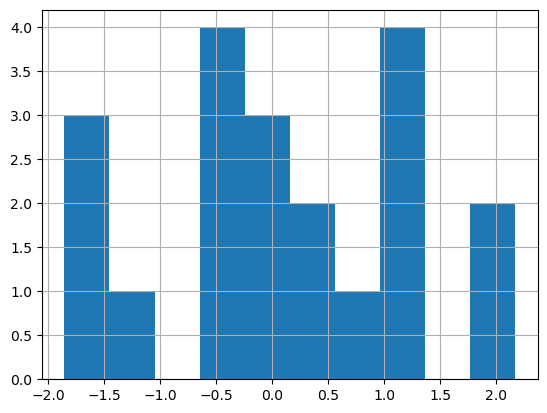

In [213]:
arr.hist() # bins=10 이 기본

전체 값의 범위를 4등분한 다음에 막대그래프를 그려보자.

In [221]:
factor = pd.cut(arr, bins=4)
factor

0       (0.158, 1.165]
1     (-1.859, -0.848]
2       (0.158, 1.165]
3       (0.158, 1.165]
4       (0.158, 1.165]
5       (1.165, 2.171]
6      (-0.848, 0.158]
7      (-0.848, 0.158]
8      (-0.848, 0.158]
9      (-0.848, 0.158]
10      (1.165, 2.171]
11      (0.158, 1.165]
12    (-1.859, -0.848]
13     (-0.848, 0.158]
14      (0.158, 1.165]
15    (-1.859, -0.848]
16      (1.165, 2.171]
17     (-0.848, 0.158]
18    (-1.859, -0.848]
19     (-0.848, 0.158]
dtype: category
Categories (4, interval[float64, right]): [(-1.859, -0.848] < (-0.848, 0.158] < (0.158, 1.165] < (1.165, 2.171]]

구간별 항목의 개수 확인

In [222]:
factor.value_counts()

(-0.848, 0.158]     7
(0.158, 1.165]      6
(-1.859, -0.848]    4
(1.165, 2.171]      3
dtype: int64

막대그래프 그리기

<AxesSubplot:>

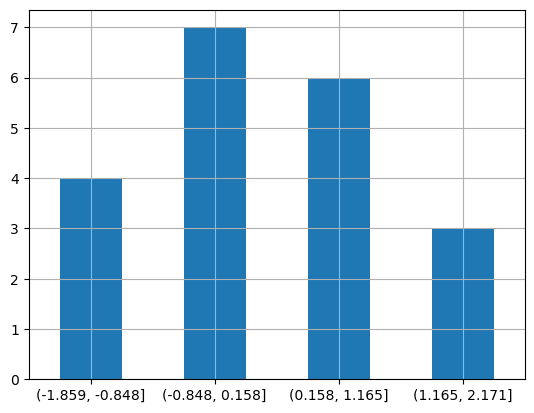

In [224]:
factor.value_counts().sort_index().plot.bar(rot=0, grid=True)

4등분한 구간에 라벨을 붙이면 정보를 보다 정확히 전달한다.

In [225]:
factor = pd.cut(arr, bins=4, labels=['A', 'B', 'C', 'D'])
factor

0     C
1     A
2     C
3     C
4     C
5     D
6     B
7     B
8     B
9     B
10    D
11    C
12    A
13    B
14    C
15    A
16    D
17    B
18    A
19    B
dtype: category
Categories (4, object): ['A' < 'B' < 'C' < 'D']

<AxesSubplot:>

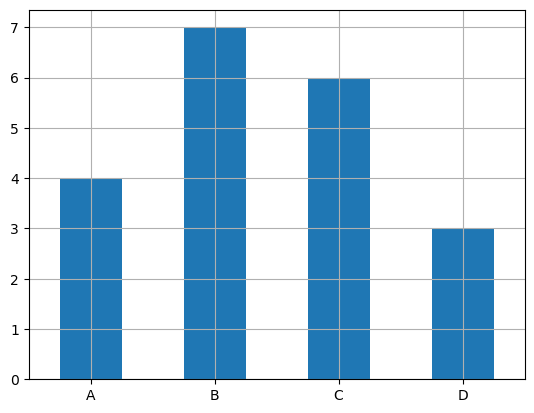

In [226]:
factor.value_counts().sort_index().plot.bar(rot=0, grid=True)

### 문자열 메서드 활용

참고

- [정규식](https://docs.python.org/3/library/re.html)
- [벡터와 문자열 메서드](https://pandas.pydata.org/docs/user_guide/text.html#text-string-methods)

`str` 속성은 모든 항목을 문자열로 변환한 벡터를 가리킨다.

In [227]:
s = pd.Series(["A", "B", "C", "Aaba", "Baca", np.nan, "CABA", "dog", "cat"])
s.str

변환된 벡터에 문자열 메서드를 적용하면 새로운 시리즈가 생성된다.

In [229]:
s.str.lower()

0       a
1       b
2       c
3    aaba
4    baca
5     NaN
6    caba
7     dog
8     cat
dtype: object

In [232]:
df = pd.DataFrame(np.random.randn(3, 2), columns=[" Column A ", " Column B "], index=range(3))
df

Column A    Column B 
0   -1.212560    0.159991
1   -0.755223    0.349896
2    0.977542   -0.138585

열 라벨에 대해 문자열 메서드를 적용해보자.

- 소문자화

In [233]:
df.columns.str.lower()

Index([' column a ', ' column b '], dtype='object')

- 양끝의 공백 제거

In [234]:
df.columns.str.lower().str.strip()

Index(['column a', 'column b'], dtype='object')

- 중간에 위치한 공백을 밑줄(underscore)로 대체

In [235]:
df.columns.str.strip().str.lower().str.replace(" ", "_")

Index(['column_a', 'column_b'], dtype='object')

## Merge

### Concat

pandas provides various facilities for easily combining together Series and DataFrame objects with various kinds of set logic for the indexes and relational algebra functionality in the case of join / merge-type operations.

See the [Merging section](https://pandas.pydata.org/docs/user_guide/merging.html#merging).

Concatenating pandas objects together along an axis with [`concat()`](https://pandas.pydata.org/docs/reference/api/pandas.concat.html#pandas.concat): 

In [63]:
df = pd.DataFrame(np.random.randn(10, 4))
df

0         1         2         3
0 -0.619646 -0.313922 -2.005981 -0.108807
1 -0.306901  0.225916  0.713064  0.120466
2  0.225502 -0.626539 -1.147919  0.358365
3 -0.233750  0.067822 -1.166952  1.501096
4 -1.282384 -0.124562  0.104905  1.126760
5  0.051615 -0.851034  0.027638  1.131873
6 -0.270948  0.791619  0.012448  1.796238
7 -0.678097 -0.970002 -0.535542 -2.122988
8  1.080401  1.623622 -0.890326  1.466915
9  0.665962 -0.512106 -0.473330 -1.547568

In [64]:
# break it onto pieces
pieces = [df[:3], df[3:7], df[7:]]

pd.concat(pieces)

0         1         2         3
0 -0.619646 -0.313922 -2.005981 -0.108807
1 -0.306901  0.225916  0.713064  0.120466
2  0.225502 -0.626539 -1.147919  0.358365
3 -0.233750  0.067822 -1.166952  1.501096
4 -1.282384 -0.124562  0.104905  1.126760
5  0.051615 -0.851034  0.027638  1.131873
6 -0.270948  0.791619  0.012448  1.796238
7 -0.678097 -0.970002 -0.535542 -2.122988
8  1.080401  1.623622 -0.890326  1.466915
9  0.665962 -0.512106 -0.473330 -1.547568

NOTE: Adding a column to a [`DataFrame`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.html#pandas.DataFrame) is relatively fast. However, adding a row requires a copy, and may be expensive. We recommend passing a pre-built list of records to the [`DataFrame`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.html#pandas.DataFrame) constructor instead of building a [`DataFrame`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.html#pandas.DataFrame) by iteratively appending records to it.

### Join

[`merge()`](https://pandas.pydata.org/docs/reference/api/pandas.merge.html#pandas.merge) enables SQL style join types along specific columns. See the [Database style joining](https://pandas.pydata.org/docs/user_guide/merging.html#merging-join) section.

In [ ]:
left = pd.DataFrame({"key": ["foo", "foo"], "lval": [1, 2]})
right = pd.DataFrame({"key": ["foo", "foo"], "rval": [4, 5]})
print(left)
print(right)
pd.merge(left, right, on="key")

   key  lval
0  foo     1
1  foo     2
   key  rval
0  foo     4
1  foo     5


key  lval  rval
0  foo     1     4
1  foo     1     5
2  foo     2     4
3  foo     2     5

Adding a column to a `DataFrame` is relatively fast. However adding a row requires a copy, and may be expensive. It is recorecommended passing a pre-build list of records to the `DataFrame` constructor instead of buildinga `DataFrame` by iteratively appending records to it.

Another example that can be given is:

In [ ]:
left = pd.DataFrame({"key": ["foo", "bar"], "lval": [1, 2]})
right = pd.DataFrame({"key": ["foo", "bar"], "rval": [4, 5]})
print(left)
print(right)
pd.merge(left, right, on="key")

   key  lval
0  foo     1
1  bar     2
   key  rval
0  foo     4
1  bar     5


key  lval  rval
0  foo     1     4
1  bar     2     5

## Grouping

By 'group by' we are referring to a process invloving one or more of the following steps:


*   **Splitting** the data into group base on some criteria
*   **Applying** a function to each group independently

*   **Combining** the results into a data structure

See the [Grouping section](https://pandas.pydata.org/docs/user_guide/groupby.html#groupby).


In [ ]:
df = pd.DataFrame({'A': ['foo', 'bar', 'foo', 'bar',
                         'foo', 'bar', 'foo', 'bar'],
                   'B': ['one', 'one', 'two', 'three',
                         'two', 'two', 'one', 'three'],
                   'C': np.random.randn(8),
                   'D': np.random.randn(8)})
df

A      B         C         D
0  foo    one -0.848117  0.290586
1  bar    one  1.763683 -0.199249
2  foo    two -0.115365 -0.528739
3  bar  three  0.657117 -0.188029
4  foo    two -0.142749 -0.648729
5  bar    two  0.696670 -1.187473
6  foo    one -0.617058 -0.621837
7  bar  three -1.294211 -0.675882

Grouping and then applying the `sum()` funcion to the resulting group:

In [ ]:
df.groupby('A')[["C", "D"]].sum()

C         D
A                      
bar  1.823258 -2.250633
foo -1.723289 -1.508719

Grouping by multiple columns forms a hierarchical index, and again we can apply the `sum()` function:

In [ ]:
df.groupby(["A", "B"]).sum()

C         D
A   B                        
bar one    1.763683 -0.199249
    three -0.637095 -0.863911
    two    0.696670 -1.187473
foo one   -1.465175 -0.331251
    two   -0.258114 -1.177468

## Reshaping

See the sections on [Hierarchical Indexing](https://pandas.pydata.org/docs/user_guide/advanced.html#advanced-hierarchical) and [Reshaping](https://pandas.pydata.org/docs/user_guide/reshaping.html#reshaping-stacking).

### Stack

In [ ]:
tuples = list(
    zip(
        ["bar", "bar", "baz", "baz", "foo", "foo", "qux", "qux"],
        ["one", "two", "one", "two", "one", "two", "one", "two"],
    )
)

index = pd.MultiIndex.from_tuples(tuples, names=["first", "second"])

df = pd.DataFrame(np.random.randn(8, 2), index=index, columns=["A", "B"])
df2 = df[:4]
df2

A         B
first second                    
bar   one    -0.066512 -1.932089
      two     0.738722  2.306815
baz   one     0.503809 -0.561800
      two     2.477166  1.416968

The [`stack()`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.stack.html#pandas.DataFrame.stack) method “compresses” a level in the DataFrame’s columns:



In [ ]:
stacked = df2.stack()
stacked

first  second   
bar    one     A   -0.066512
               B   -1.932089
       two     A    0.738722
               B    2.306815
baz    one     A    0.503809
               B   -0.561800
       two     A    2.477166
               B    1.416968
dtype: float64

With a “stacked” DataFrame or Series (having a [MultiIndex](https://pandas.pydata.org/docs/reference/api/pandas.MultiIndex.html#pandas.MultiIndex) as the `index`), the inverse operation of [`stack()`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.stack.html#pandas.DataFrame.stack) is [`unstack()`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.unstack.html#pandas.DataFrame.unstack), which by default unstacks the **last level**:

In [ ]:
stacked.unstack()

A         B
first second                    
bar   one    -0.066512 -1.932089
      two     0.738722  2.306815
baz   one     0.503809 -0.561800
      two     2.477166  1.416968

In [ ]:
stacked.unstack(1)

second        one       two
first                      
bar   A -0.066512  0.738722
      B -1.932089  2.306815
baz   A  0.503809  2.477166
      B -0.561800  1.416968

In [ ]:
stacked.unstack(0)

first          bar       baz
second                      
one    A -0.066512  0.503809
       B -1.932089 -0.561800
two    A  0.738722  2.477166
       B  2.306815  1.416968

### Pivot tables

See the section on [Pivot Tables](https://pandas.pydata.org/docs/user_guide/reshaping.html#reshaping-pivot).

In [ ]:
df = pd.DataFrame(
    {
        "A": ["one", "one", "two", "three"] * 3,
        "B": ["A", "B", "C"] * 4,
        "C": ["foo", "foo", "foo", "bar", "bar", "bar"] * 2,
        "D": np.random.randn(12),
        "E": np.random.randn(12),
    }
)
df

A  B    C         D         E
0     one  A  foo -0.608827 -0.172586
1     one  B  foo -1.014371  0.415117
2     two  C  foo -0.837770 -0.597578
3   three  A  bar  1.555443 -1.772584
4     one  B  bar  1.239417  0.566768
5     one  C  bar -0.690746 -0.347901
6     two  A  foo  1.130389 -0.317614
7   three  B  foo -0.355813  0.687121
8     one  C  foo -1.306915  0.784907
9     one  A  bar -0.134371 -0.687810
10    two  B  bar -1.430566 -0.524227
11  three  C  bar  0.032900  1.493735

[`pivot_table()`](https://pandas.pydata.org/docs/reference/api/pandas.pivot_table.html#pandas.pivot_table) pivots a [`DataFrame`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.html#pandas.DataFrame) specifying the `values`, `index`, and `columns`



In [ ]:
pd.pivot_table(df, values="D", index=["A", "B"], columns=["C"])

C             bar       foo
A     B                    
one   A -0.134371 -0.608827
      B  1.239417 -1.014371
      C -0.690746 -1.306915
three A  1.555443       NaN
      B       NaN -0.355813
      C  0.032900       NaN
two   A       NaN  1.130389
      B -1.430566       NaN
      C       NaN -0.837770

## Time series

pandas has simple, powerful, and efficient functionality for performing resampling operations during frequency conversion (e.g., converting secondly data into 5-minutely data). This is extremely common in, but not limited to, financial applications. See the [Time Series](https://pandas.pydata.org/docs/user_guide/timeseries.html#timeseries) section.

In [ ]:
rng = pd.date_range("1/1/2012", periods=100, freq="S")
ts = pd.Series(np.random.randint(0, 500, len(rng)), index=rng)
ts.resample("5Min").sum()

2012-01-01    23852
Freq: 5T, dtype: int64

[`Series.tz_localize()`](https://pandas.pydata.org/docs/reference/api/pandas.Series.tz_localize.html#pandas.Series.tz_localize) localizes a time series to a time zone:

In [ ]:
rng = pd.date_range("3/6/2012 00:00", periods=5, freq="D")
ts = pd.Series(np.random.randn(len(rng)), rng)
print(ts, "\n")
ts_utc = ts.tz_localize("UTC")
ts_utc

2012-03-06    0.406571
2012-03-07    2.276888
2012-03-08    0.443980
2012-03-09   -0.598940
2012-03-10   -1.531285
Freq: D, dtype: float64 



2012-03-06 00:00:00+00:00    0.406571
2012-03-07 00:00:00+00:00    2.276888
2012-03-08 00:00:00+00:00    0.443980
2012-03-09 00:00:00+00:00   -0.598940
2012-03-10 00:00:00+00:00   -1.531285
Freq: D, dtype: float64

Converting between time span representations:

In [ ]:
rng = pd.date_range("1/1/2012", periods=5, freq="M")
ts = pd.Series(np.random.randn(len(rng)), index=rng)
ps = ts.to_period()
ps

2012-01   -1.318314
2012-02   -0.986512
2012-03    0.186429
2012-04   -0.298471
2012-05    0.211679
Freq: M, dtype: float64

In [ ]:
ps.to_timestamp()

2012-01-01   -1.318314
2012-02-01   -0.986512
2012-03-01    0.186429
2012-04-01   -0.298471
2012-05-01    0.211679
Freq: MS, dtype: float64

Converting between period and timestamp enables some convenient arithmetic functions to be used. In the following example, we convert a quarterly frequency with year ending in November to 9am of the end of the month following the quarter end:

In [ ]:
prng = pd.period_range("1990Q1", "2000Q4", freq="Q-NOV")
ts = pd.Series(np.random.randn(len(prng)), prng)
ts.index = (prng.asfreq("M", "e") + 1).asfreq("H", "s") + 9
ts.head()

1990-03-01 09:00   -0.647442
1990-06-01 09:00    0.654381
1990-09-01 09:00    1.104538
1990-12-01 09:00   -0.587950
1991-03-01 09:00    0.213284
Freq: H, dtype: float64

## Categoricals

pandas can include categorical data in a [`DataFrame`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.html#pandas.DataFrame). For full docs, see the [categorical introduction](https://pandas.pydata.org/docs/user_guide/categorical.html#categorical) and the [API documentation](https://pandas.pydata.org/docs/reference/arrays.html#api-arrays-categorical).

In [ ]:
df = pd.DataFrame(
    {"id": [1, 2, 3, 4, 5, 6], "raw_grade": ["a", "b", "b", "a", "a", "e"]}
)
df

id raw_grade
0   1         a
1   2         b
2   3         b
3   4         a
4   5         a
5   6         e

Converting the raw grades to a categorical data type:

In [ ]:
df["grade"] = df["raw_grade"].astype("category")
df["grade"]

0    a
1    b
2    b
3    a
4    a
5    e
Name: grade, dtype: category
Categories (3, object): ['a', 'b', 'e']

Rename the categories to more meaningful names:

In [ ]:
new_categories = ["very good", "good", "very bad"]
df["grade"] = df["grade"].cat.rename_categories(new_categories)
df

id raw_grade      grade
0   1         a  very good
1   2         b       good
2   3         b       good
3   4         a  very good
4   5         a  very good
5   6         e   very bad

Reorder the categories and simultaneously add the missing categories (methods under [`Series.cat()`](https://pandas.pydata.org/docs/reference/api/pandas.Series.cat.html#pandas.Series.cat) return a new [`Series`](https://pandas.pydata.org/docs/reference/api/pandas.Series.html#pandas.Series) by default):

In [ ]:
df["grade"] = df["grade"].cat.set_categories(
    ["very bad", "bad", "medium", "good", "very good"]
)
df["grade"]

0    very good
1         good
2         good
3    very good
4    very good
5     very bad
Name: grade, dtype: category
Categories (5, object): ['very bad', 'bad', 'medium', 'good', 'very good']

Sorting is per order in the categories, not lexical order:

In [ ]:
df.sort_values(by="grade")

id raw_grade      grade
5   6         e   very bad
1   2         b       good
2   3         b       good
0   1         a  very good
3   4         a  very good
4   5         a  very good

Grouping by a categorical column also shows empty categories:

In [ ]:
df.groupby("grade").size()

grade
very bad     1
bad          0
medium       0
good         2
very good    3
dtype: int64

## Plotting

See the [Plotting](https://pandas.pydata.org/docs/user_guide/visualization.html#visualization) docs.

We use the standard convention for referencing the matplotlib API:

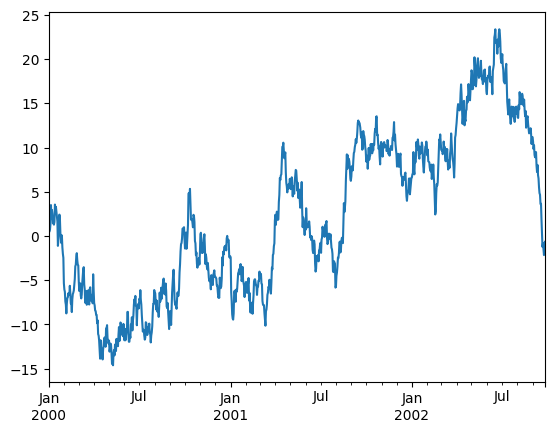

In [ ]:
import matplotlib.pyplot as plt
plt.close("all")

ts = pd.Series(np.random.randn(1000), index=pd.date_range("1/1/2000", periods=1000))
ts = ts.cumsum()
ts.plot();

If running under Jupyter Notebook, the plot will appear on [`plot()`](https://pandas.pydata.org/docs/reference/api/pandas.Series.plot.html#pandas.Series.plot). Otherwise use [`matplotlib.pyplot.show`](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.show.html) to show it or [`matplotlib.pyplot.savefig`](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.savefig.html) to write it to a file.

On a DataFrame, the [`plot()`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.html#pandas.DataFrame.plot) method is a convenience to plot all of the columns with labels:

<Figure size 640x480 with 0 Axes>

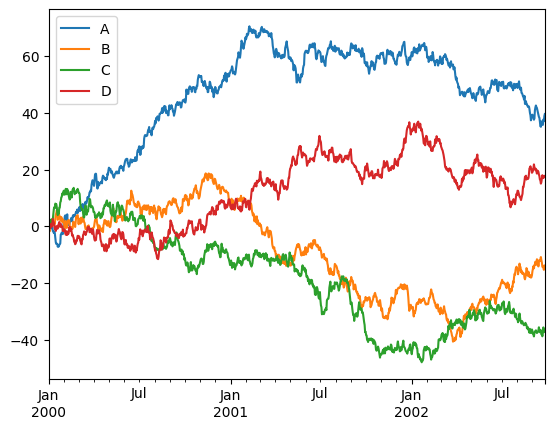

In [ ]:
df = pd.DataFrame(
    np.random.randn(1000, 4), index=ts.index, columns=["A", "B", "C", "D"]
)

df = df.cumsum()
plt.figure();
df.plot();
plt.legend(loc='best');

## Importing and exporting data

### CSV

[Writing to a csv file](https://pandas.pydata.org/docs/user_guide/io.html#io-store-in-csv): using [`DataFrame.to_csv()`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.to_csv.html#pandas.DataFrame.to_csv)

In [ ]:
df.to_csv("foo.csv")

[Reading from a csv file](https://pandas.pydata.org/docs/user_guide/io.html#io-read-csv-table): using [`read_csv()`](https://pandas.pydata.org/docs/reference/api/pandas.read_csv.html#pandas.read_csv)

In [ ]:
pd.read_csv("foo.csv")

Unnamed: 0          A          B          C          D
0    2000-01-01   0.579490  -0.408378  -0.285932  -0.035712
1    2000-01-02  -0.685348  -1.771663   0.022815   0.165348
2    2000-01-03  -0.603863  -1.653470   1.439071  -0.196666
3    2000-01-04  -0.945835   0.690462   1.444210  -0.567836
4    2000-01-05   0.118966   1.217380   2.285591   0.851422
..          ...        ...        ...        ...        ...
995  2002-09-22  35.731926 -14.358713 -37.621386  17.392921
996  2002-09-23  37.620032 -14.009780 -35.553711  17.012057
997  2002-09-24  37.009100 -15.271335 -36.368402  17.318600
998  2002-09-25  38.827031 -13.718650 -36.715253  17.809859
999  2002-09-26  39.557892 -14.276855 -37.119307  17.743718

[1000 rows x 5 columns]

### HDF5

Reading and writing to [HDFStores](https://pandas.pydata.org/docs/user_guide/io.html#io-hdf5).

Writing to a HDF5 Store using [`DataFrame.to_hdf()`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.to_hdf.html#pandas.DataFrame.to_hdf):

In [ ]:
df.to_hdf("foo.h5", "df")

Reading from a HDF5 Store using [`read_hdf()`](https://pandas.pydata.org/docs/reference/api/pandas.read_hdf.html#pandas.read_hdf):

In [ ]:
pd.read_hdf("foo.h5", "df")

A          B          C          D
2000-01-01   0.579490  -0.408378  -0.285932  -0.035712
2000-01-02  -0.685348  -1.771663   0.022815   0.165348
2000-01-03  -0.603863  -1.653470   1.439071  -0.196666
2000-01-04  -0.945835   0.690462   1.444210  -0.567836
2000-01-05   0.118966   1.217380   2.285591   0.851422
...               ...        ...        ...        ...
2002-09-22  35.731926 -14.358713 -37.621386  17.392921
2002-09-23  37.620032 -14.009780 -35.553711  17.012057
2002-09-24  37.009100 -15.271335 -36.368402  17.318600
2002-09-25  38.827031 -13.718650 -36.715253  17.809859
2002-09-26  39.557892 -14.276855 -37.119307  17.743718

[1000 rows x 4 columns]

### Excel

Reading and writing to [Excel](https://pandas.pydata.org/docs/user_guide/io.html#io-excel).

Writing to an excel file using [`DataFrame.to_excel()`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.to_excel.html#pandas.DataFrame.to_excel):

In [ ]:
df.to_excel("foo.xlsx", sheet_name="Sheet1")

Reading from an excel file using [`read_excel()`](https://pandas.pydata.org/docs/reference/api/pandas.read_excel.html#pandas.read_excel):

In [ ]:
pd.read_excel("foo.xlsx", "Sheet1", index_col=None, na_values=["NA"])

Unnamed: 0          A          B          C          D
0   2000-01-01   0.579490  -0.408378  -0.285932  -0.035712
1   2000-01-02  -0.685348  -1.771663   0.022815   0.165348
2   2000-01-03  -0.603863  -1.653470   1.439071  -0.196666
3   2000-01-04  -0.945835   0.690462   1.444210  -0.567836
4   2000-01-05   0.118966   1.217380   2.285591   0.851422
..         ...        ...        ...        ...        ...
995 2002-09-22  35.731926 -14.358713 -37.621386  17.392921
996 2002-09-23  37.620032 -14.009780 -35.553711  17.012057
997 2002-09-24  37.009100 -15.271335 -36.368402  17.318600
998 2002-09-25  38.827031 -13.718650 -36.715253  17.809859
999 2002-09-26  39.557892 -14.276855 -37.119307  17.743718

[1000 rows x 5 columns]

## Gotchas

If you are attempting to perform a boolean operation on a [`Series`](https://pandas.pydata.org/docs/reference/api/pandas.Series.html#pandas.Series) or [`DataFrame`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.html#pandas.DataFrame) you might see an exception like:

In [ ]:
if pd.Series([False, True, False]):
     print("I was true")

ValueError: ignored

See [Comparisons](https://pandas.pydata.org/docs/user_guide/basics.html#basics-compare) and [Gotchas](https://pandas.pydata.org/docs/user_guide/gotchas.html#gotchas) for an explanation and what to do.